In [133]:
% matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [134]:
comp = pd.read_csv("/home/mikhail/Projects/nmr/sandbox/computed_matrix", sep = '\t', header=None)
for i in range(comp.shape[0]):
    comp.iloc[i, i] = 0.0

In [135]:
exp_stacked = pd.read_csv("/home/mikhail/Projects/nmr/sandbox/matrix/0", sep = '\t', header=None)
empty = pd.DataFrame([[0.0]*comp.shape[0]]*comp.shape[1])
exp = (empty + exp_stacked.pivot(0, 1, 2)).fillna(0.0)

In [136]:
groups = {}
groups_file = open("/home/mikhail/Projects/nmr/sandbox/groups/eq_groups", 'r')
for line in groups_file.readlines():
    nums = line.split()
    groups.update({';'.join(nums[1:]) : int(nums[0])})
groups_file.close()

In [137]:
# just change groups index to real atom group index from pdb

reverse_groups = dict(zip(groups.values(), groups.keys()))

comp_tmp = comp.copy()
comp_tmp.columns = comp_tmp.columns.map(lambda x: reverse_groups[x])
comp_tmp.index = comp_tmp.columns
comp_tmp = comp_tmp.stack()

exp_tmp = exp.copy()
exp_tmp.columns = exp_tmp.columns.map(lambda x: reverse_groups[x])
exp_tmp.index = exp_tmp.columns
exp_tmp = exp_tmp.stack()

comp_tmp[exp_tmp[exp_tmp > 0.0].index].to_csv('dna_computed', header=None, sep='\t')
exp_tmp[exp_tmp > 0.0].to_csv('dna_experiment', header=None, sep='\t')

In [138]:
# if we have frequencies

noesy=pd.read_csv("/home/mikhail/Projects/nmr/data/noesy2.csv", sep = ',')

freqs = list(noesy.iloc[:, 1])+list(noesy.iloc[:, 2])
names = list(noesy.iloc[:, 4])+list(noesy.iloc[:, 5])

group2freq = [-1]*len(groups)

for freq, name in zip(freqs, names):
    group = name.split('|')[0]
    group2freq[groups[group]] = freq

def assign_freqs(matrix, freqs):
    matrix.columns = freqs
    matrix.index = freqs
    matrix = matrix.sort_index(0)
    matrix = matrix.sort_index(1)
    return matrix

exp_reind = assign_freqs(exp, group2freq)
comp_reind = assign_freqs(comp, group2freq)

KeyError: '51'

NameError: name 'exp_reind' is not defined

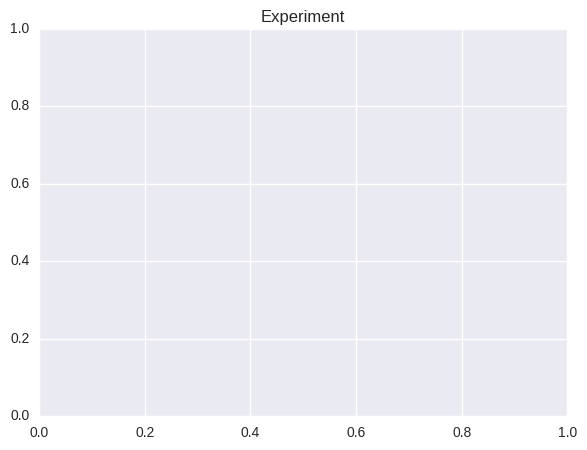

In [139]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Experiment")
sns.heatmap(exp_reind, linewidths=0.01)
plt.subplot(1, 2, 2)
sns.heatmap(-comp_reind, linewidths=0.01)
plt.title("Computed (good complex CIL_05734)")

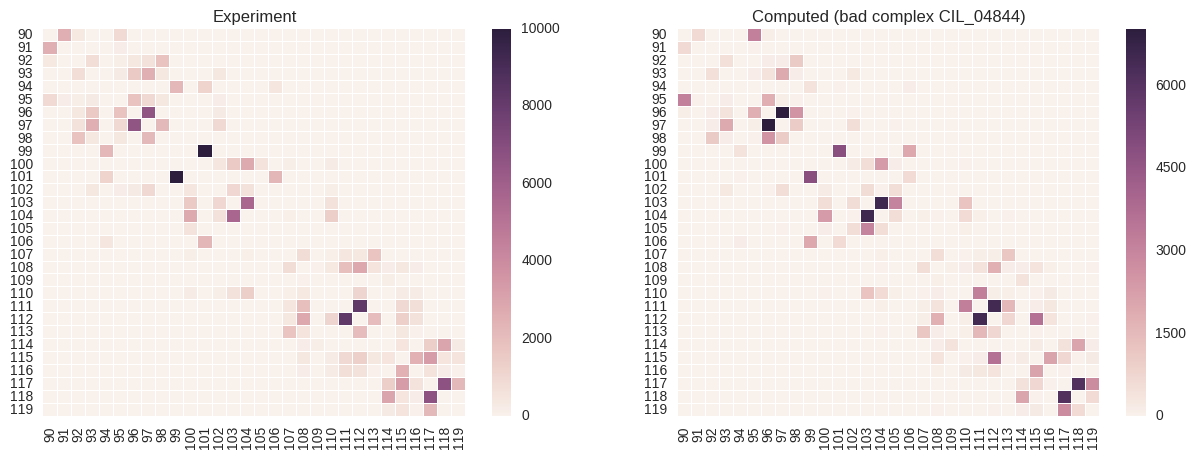

In [140]:
def mksym(df):
    local = df.copy()
    for i in range(local.shape[0]):
        for j in range(local.shape[1]):
            if local.iloc[i, j] < 0.00001:
                local.iloc[i, j] = local.iloc[j, i]
    return local

rect = (90, 120)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Experiment")
sns.heatmap(mksym(exp.iloc[rect[0]:rect[1], rect[0]:rect[1]]), linewidths=0.01)
plt.subplot(1, 2, 2)
sns.heatmap(comp.iloc[rect[0]:rect[1], rect[0]:rect[1]], linewidths=0.01)
plt.title("Computed (bad complex CIL_04844)")

In [12]:
chi_scores = pd.read_csv('/home/mikhail/Projects/nmr/results/60k/chi_scores', sep='\t', header=None, index_col=0)

OSError: File b'/home/mikhail/Projects/nmr/results/60k/chi_scores' does not exist

### Sorted scores for 60k cycles

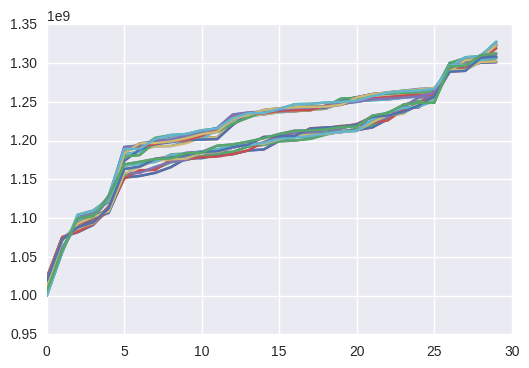

In [24]:
n = 30
for i in chi_scores.columns:
    plt.plot(list(range(n)), sorted(chi_scores[i][:n]))
plt.show()